In [1]:
!pip install mlxtend --user
!pip install lightgbm --user
!pip install xgboost --user
!pip install plotly --user

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [1]:
import os
import pandas as pd
import scipy as sp
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

def mae(y, y_pred):
    return np.mean(np.absolute(np.subtract(y, y_pred)))

def r2(y, y_pred):
    return 1 - np.sum((y - y_pred)**2)/np.sum((y - np.mean(y))**2)

def mape(y, y_pred):
    return (np.mean(np.divide(np.absolute(y - y_pred), y))*100)

def errors(y, y_pred):
    return np.absolute(y - y_pred)

In [3]:
#Summer, parent compounds

##Subsetting order:
#K as Potassium
#N as Ammonium
#N as nitrate
#N as urea
#K as K2O
#P as phosphorus
#P as P2O5
#Soil Organic Matter
#Crop Protection

In [ ]:
df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')
plt.figure(figsize=(8,5))
df['Soil_Organic_Matter'].hist(bins = 20)
plt.show()

415


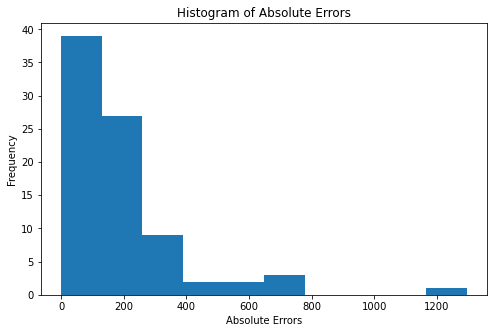

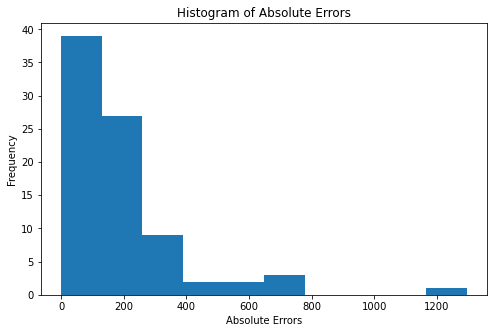

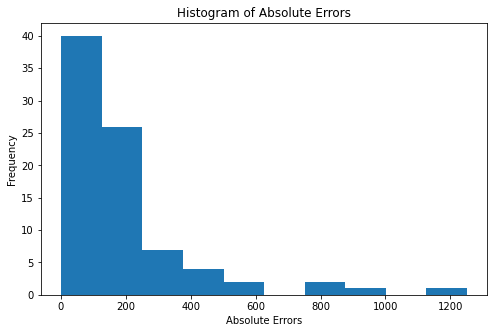

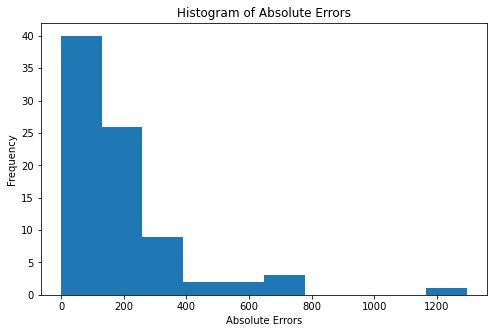

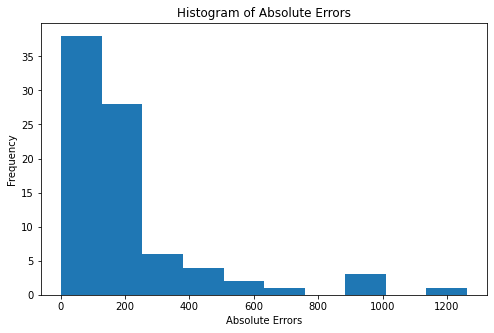

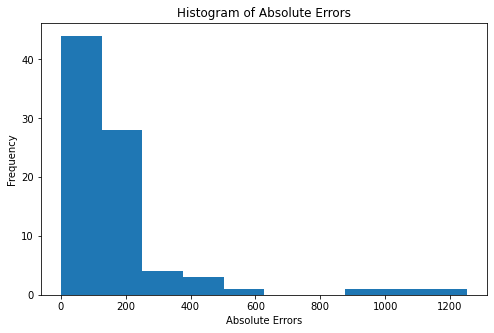

[18:34:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


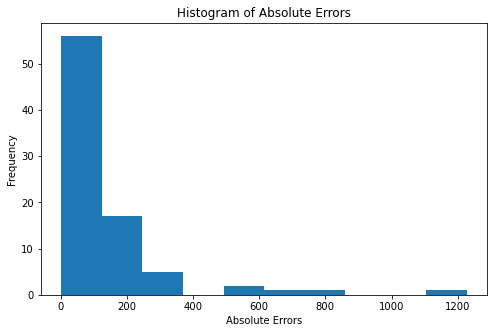

OLS
MAE on test data: 184.3256095443209
RMSE on test data: 272.7699184653415
R squared on test data: 0.9115310596785096
MAPE on test data: 2.5554167485982293


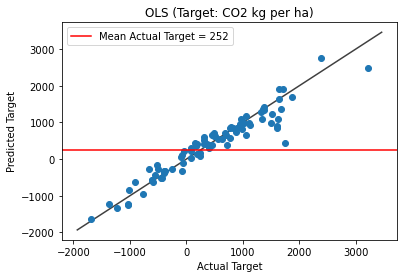

Lasso
MAE on test data: 184.31342184746643
RMSE on test data: 272.78399804647427
R squared on test data: 0.911521926429673
MAPE on test data: 2.580336449187763


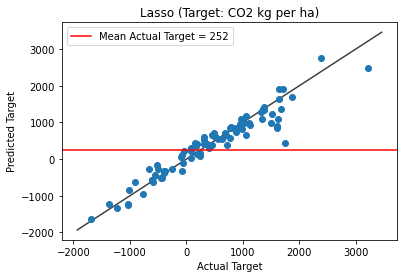

Ridge
MAE on test data: 192.85630257179136
RMSE on test data: 285.7333715691949
R squared on test data: 0.9029222260611794
MAPE on test data: 5.401789474482722


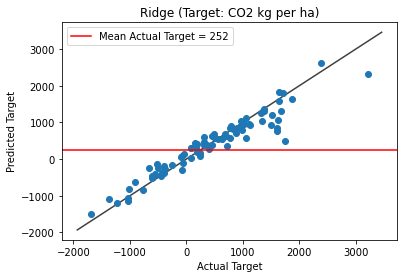

ElasticNet
MAE on test data: 184.30506393418693
RMSE on test data: 272.79530905331444
R squared on test data: 0.9115145887789959
MAPE on test data: 2.5973284431873256


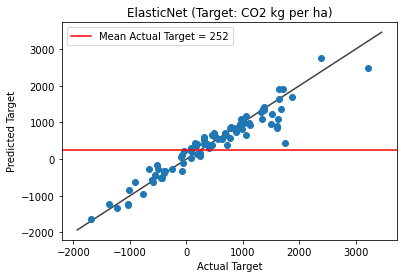

SVR
MAE on test data: 206.4541237115614
RMSE on test data: 312.18712827088507
R squared on test data: 0.8841148297521919
MAPE on test data: 12.874765136366351


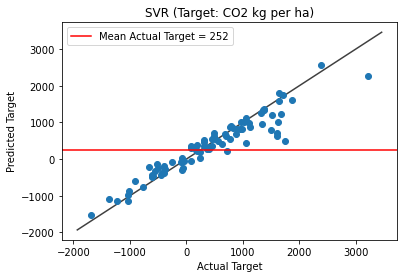

GBR
MAE on test data: 169.29539475985288
RMSE on test data: 268.2527867403301
R squared on test data: 0.9144369292979491
MAPE on test data: 3.143537616627963


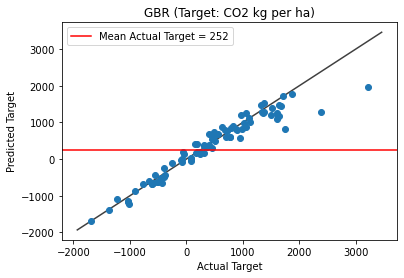

XGBoost
MAE on test data: 135.51926970280803
RMSE on test data: 231.35974666274106
R squared on test data: 0.9363536536673802
MAPE on test data: 5.648264641998429


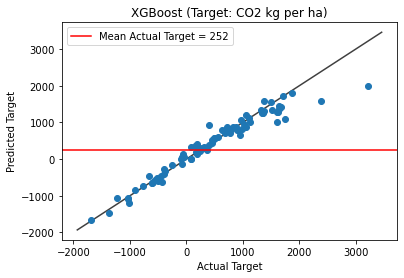

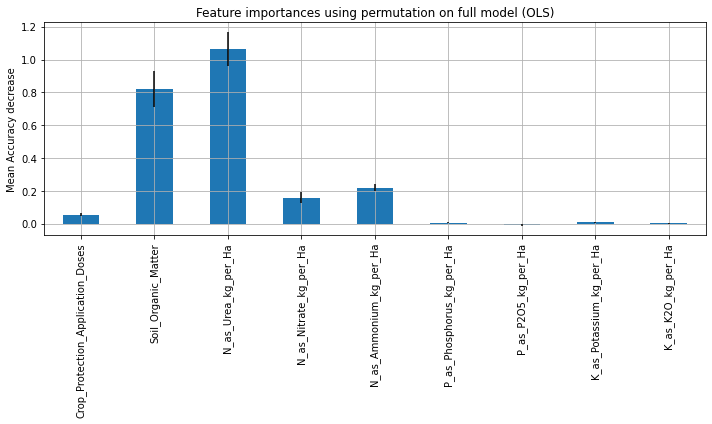

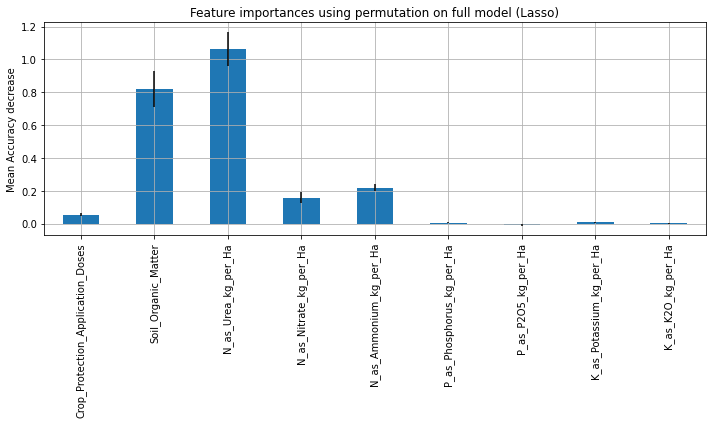

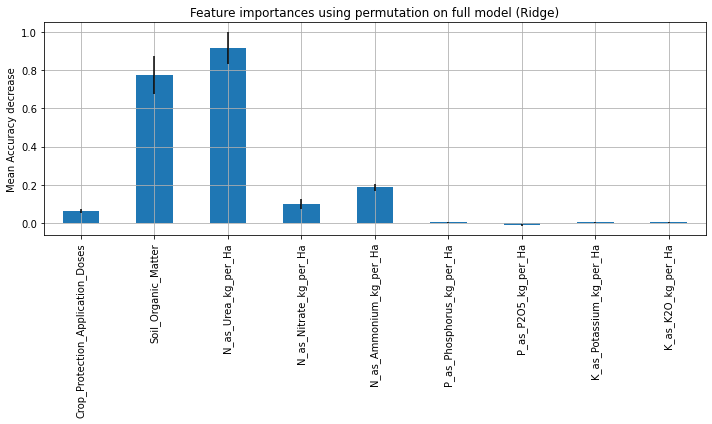

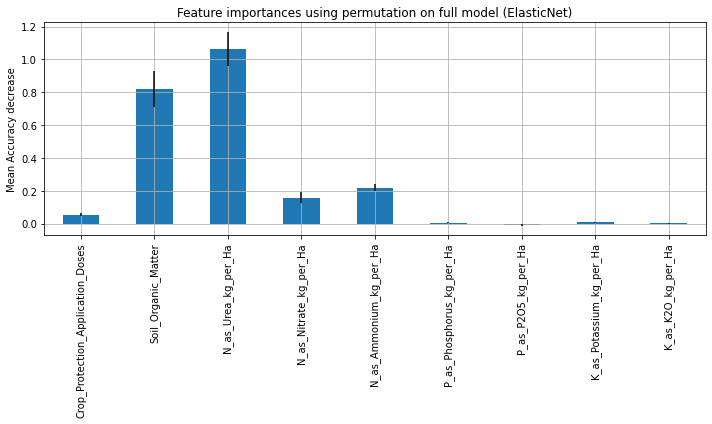

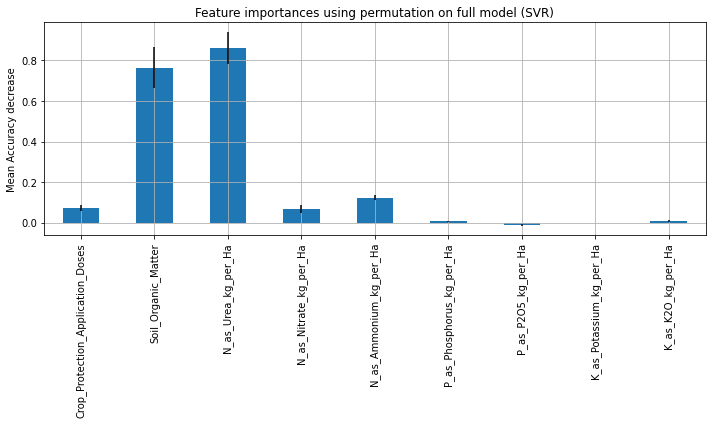

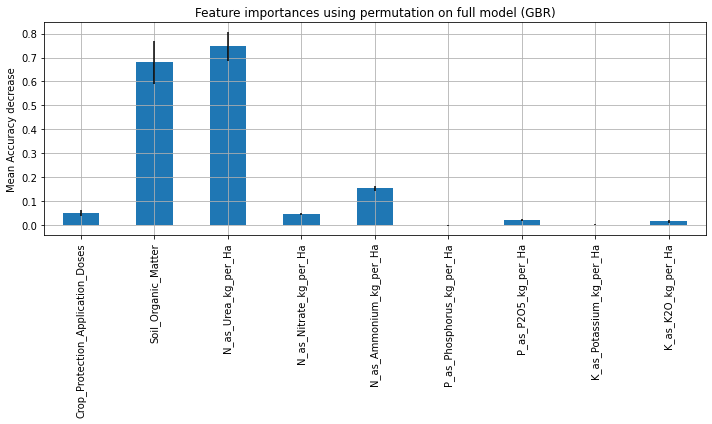

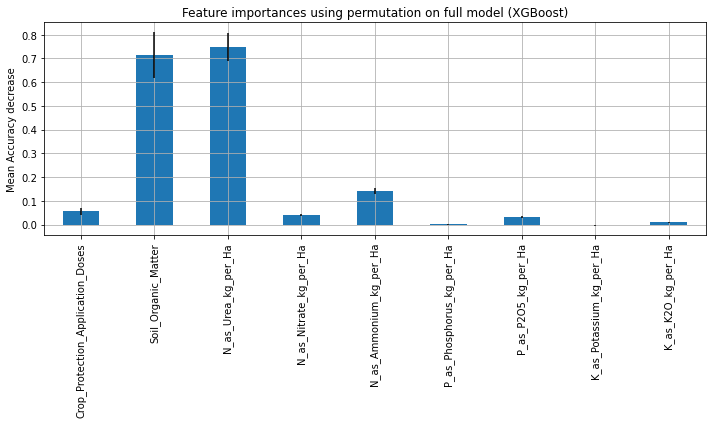

In [5]:
#Summer CO2 Prediction, parent compounds

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')

df = df.drop(columns = ['Yield_kg_per_Ha'])

train_CO2_kg_per_ha, test_CO2_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)


X_train_CO2_kg_per_ha = train_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha'])
X_test_CO2_kg_per_ha = test_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_CO2_kg_per_ha)
X_train_CO2_kg_per_ha = standard_scaler_X.transform(X_train_CO2_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_CO2_kg_per_ha)
X_train_CO2_kg_per_ha = power_transform_X.transform(X_train_CO2_kg_per_ha)

X_test_CO2_kg_per_ha = standard_scaler_X.transform(X_test_CO2_kg_per_ha)
X_test_CO2_kg_per_ha = power_transform_X.transform(X_test_CO2_kg_per_ha)

y_train_CO2_kg_per_ha = np.array(train_CO2_kg_per_ha['CO2_kg_per_Ha']).reshape(-1, 1)

mean_CO2_kg_per_ha = y_train_CO2_kg_per_ha.mean()

y_test_CO2_kg_per_ha = np.array(test_CO2_kg_per_ha['CO2_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_CO2_kg_per_ha))

y_train_CO2_kg_per_ha = standard_scaler_y.transform(y_train_CO2_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_CO2_kg_per_ha)

y_train_CO2_kg_per_ha = power_transform_y.transform(y_train_CO2_kg_per_ha)

y_test_CO2_kg_per_ha = standard_scaler_y.transform(y_test_CO2_kg_per_ha)

y_test_CO2_kg_per_ha = power_transform_y.transform(y_test_CO2_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_CO2_kg_per_ha, y_train_CO2_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_CO2_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_CO2_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_CO2_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_CO2_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: CO2 kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_CO2_kg_per_ha, y_test_CO2_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
print(len(X_train_CO2_kg_per_ha))
print(len(X_test_CO2_kg_per_ha))

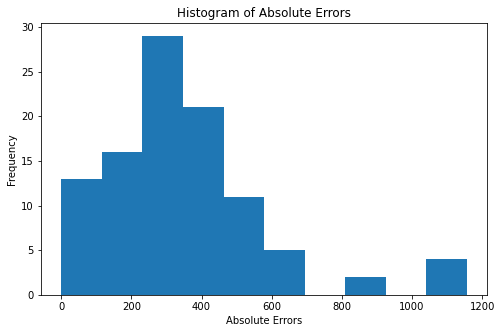

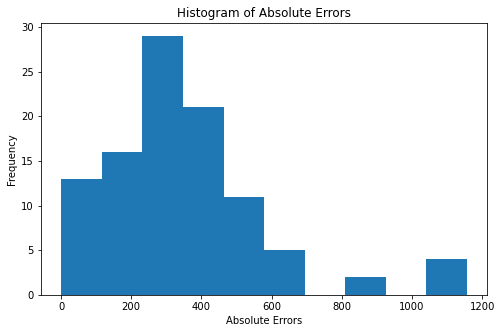

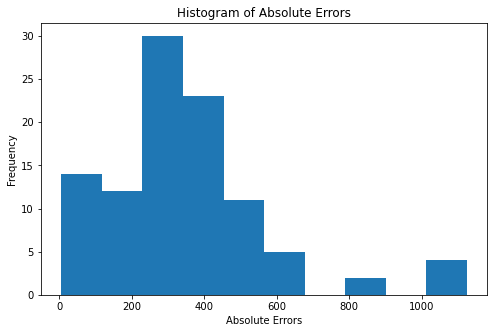

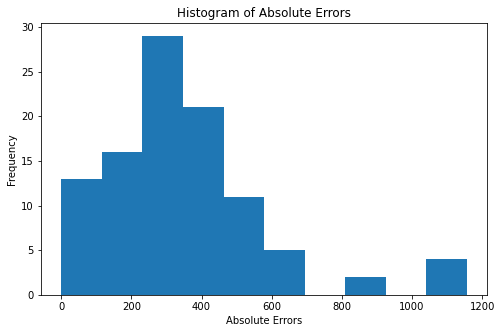

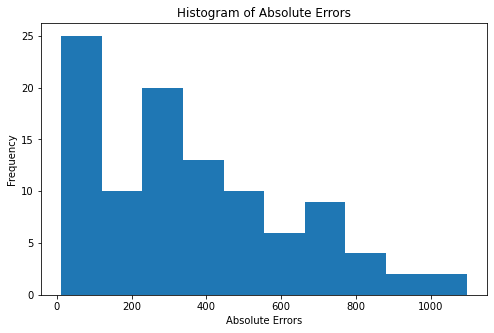

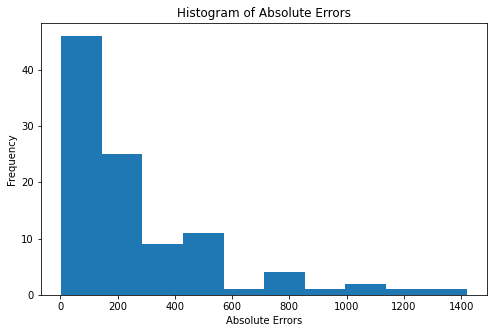

[17:25:35] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


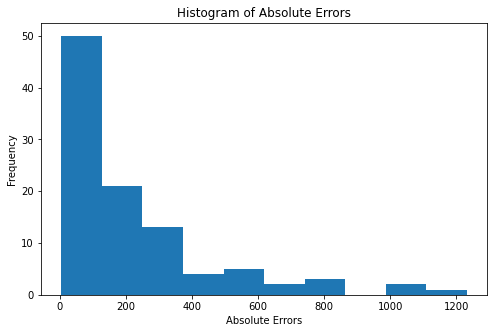

OLS
MAE on test data: 354.47862396018405
RMSE on test data: 423.23709226567246
R squared on test data: 0.6691533653673172
MAPE on test data: 13.457675257856078


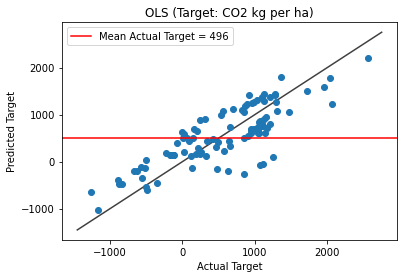

Lasso
MAE on test data: 354.52788053814913
RMSE on test data: 423.1768290544779
R squared on test data: 0.6692475747905391
MAPE on test data: 13.36887310945753


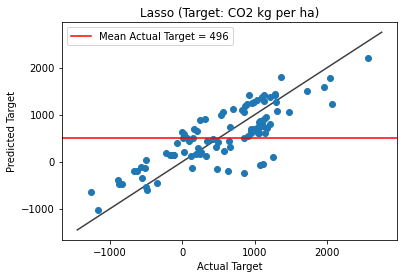

Ridge
MAE on test data: 353.3902158949339
RMSE on test data: 422.0938038687351
R squared on test data: 0.6709383801438843
MAPE on test data: 10.975676372606035


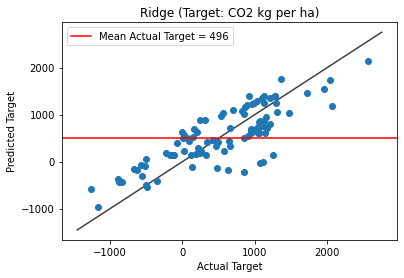

ElasticNet
MAE on test data: 354.52096604816893
RMSE on test data: 423.1833436824724
R squared on test data: 0.6692373911252428
MAPE on test data: 13.379033971981654


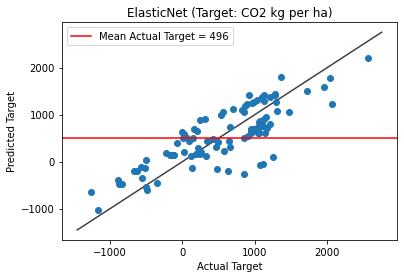

SVR
MAE on test data: 361.96362392541045
RMSE on test data: 446.48912687102944
R squared on test data: 0.6318023166069742
MAPE on test data: -23.823227477857724


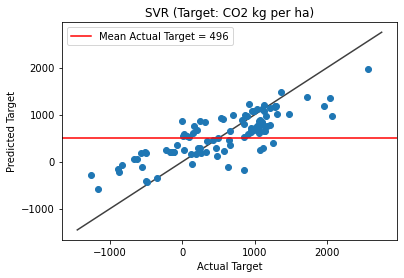

GBR
MAE on test data: 256.08086867550793
RMSE on test data: 380.44486976104787
R squared on test data: 0.7326730512053412
MAPE on test data: 37.518901203479906


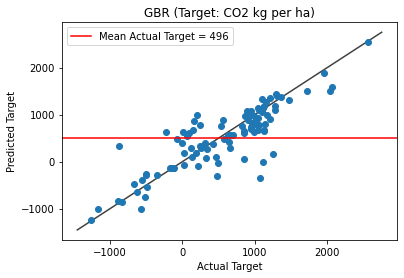

XGBoost
MAE on test data: 220.50124035297057
RMSE on test data: 332.6498128636818
R squared on test data: 0.7956221414981502
MAPE on test data: 35.98807153588932


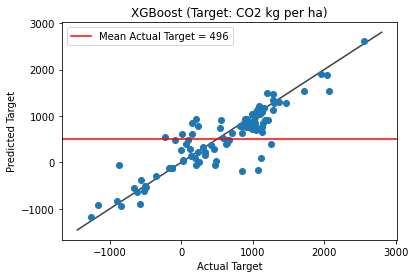

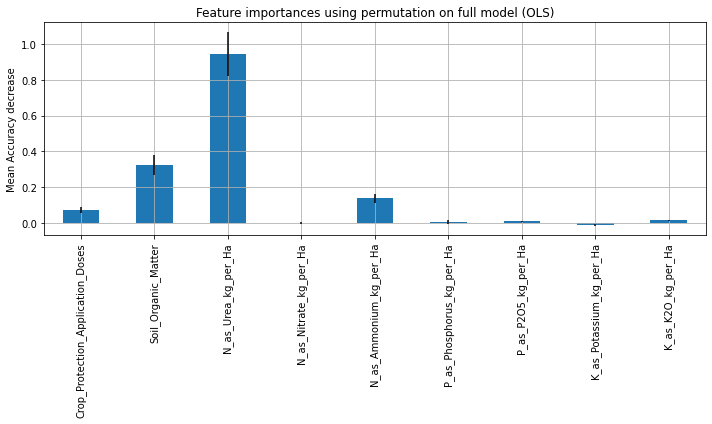

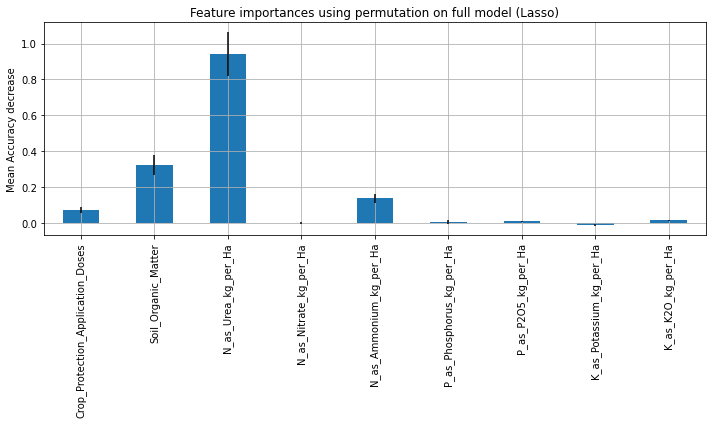

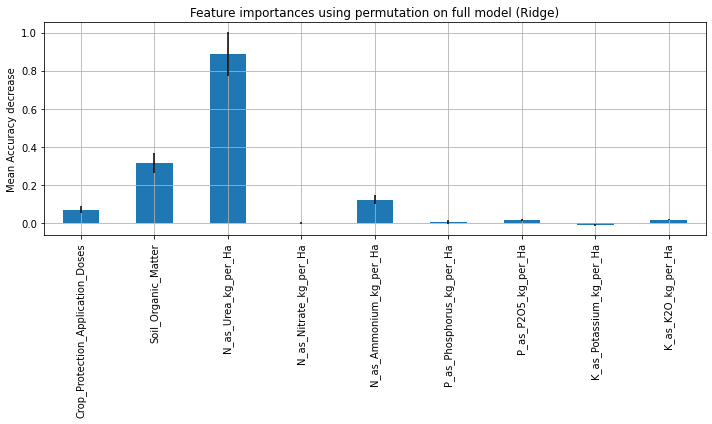

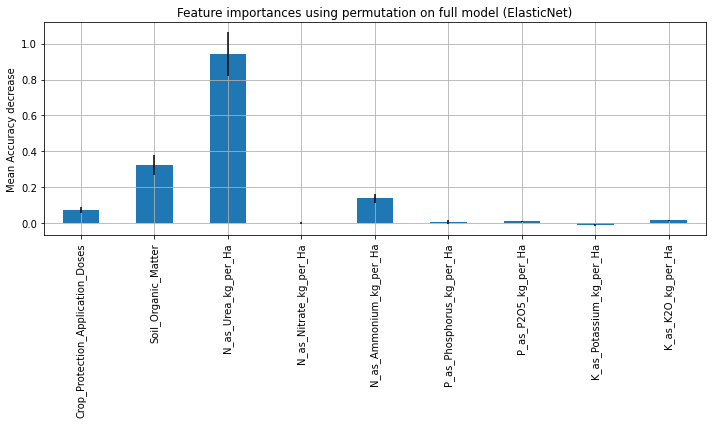

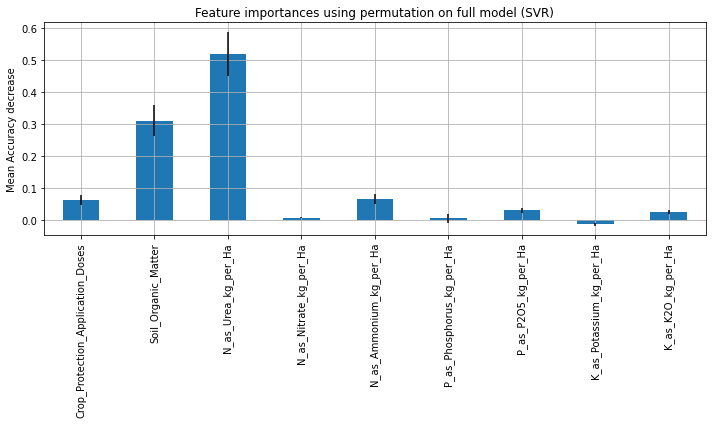

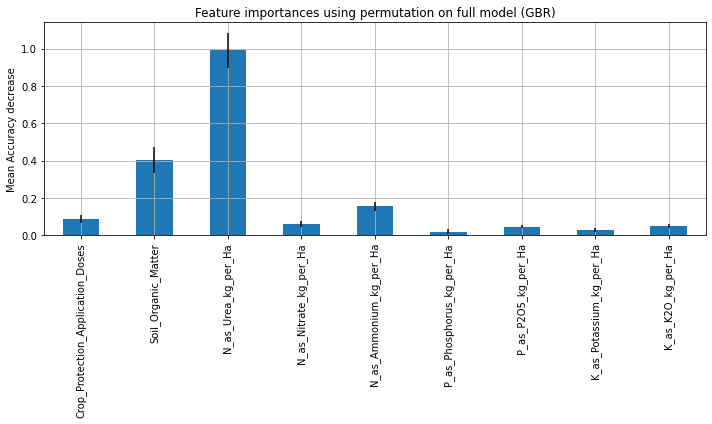

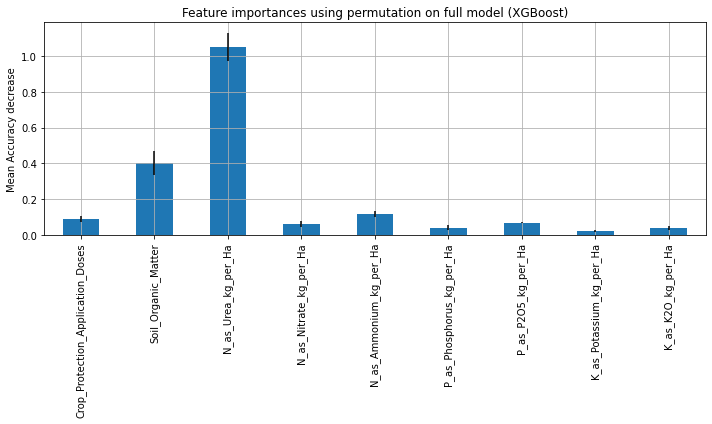

In [10]:
#Winter CO2 Prediction, parent compounds

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')

df = df.drop(columns = ['Yield_kg_per_Ha'])

train_CO2_kg_per_ha, test_CO2_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

X_train_CO2_kg_per_ha = train_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha'])
X_test_CO2_kg_per_ha = test_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_CO2_kg_per_ha)
X_train_CO2_kg_per_ha = standard_scaler_X.transform(X_train_CO2_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_CO2_kg_per_ha)
X_train_CO2_kg_per_ha = power_transform_X.transform(X_train_CO2_kg_per_ha)

X_test_CO2_kg_per_ha = standard_scaler_X.transform(X_test_CO2_kg_per_ha)
X_test_CO2_kg_per_ha = power_transform_X.transform(X_test_CO2_kg_per_ha)

y_train_CO2_kg_per_ha = np.array(train_CO2_kg_per_ha['CO2_kg_per_Ha']).reshape(-1, 1)

mean_CO2_kg_per_ha = y_train_CO2_kg_per_ha.mean()

y_test_CO2_kg_per_ha = np.array(test_CO2_kg_per_ha['CO2_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_CO2_kg_per_ha))

y_train_CO2_kg_per_ha = standard_scaler_y.transform(y_train_CO2_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_CO2_kg_per_ha)

y_train_CO2_kg_per_ha = power_transform_y.transform(y_train_CO2_kg_per_ha)

y_test_CO2_kg_per_ha = standard_scaler_y.transform(y_test_CO2_kg_per_ha)

y_test_CO2_kg_per_ha = power_transform_y.transform(y_test_CO2_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_CO2_kg_per_ha, y_train_CO2_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_CO2_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_CO2_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_CO2_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_CO2_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: CO2 kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_CO2_kg_per_ha, y_test_CO2_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [11]:
print(len(X_train_CO2_kg_per_ha))
print(len(X_test_CO2_kg_per_ha))

404
101


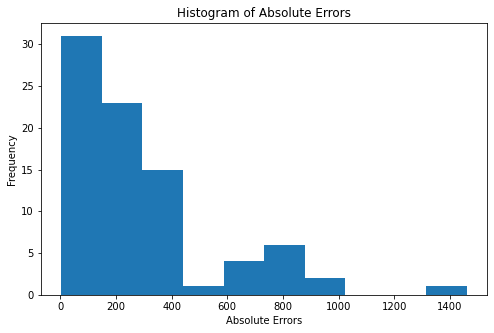

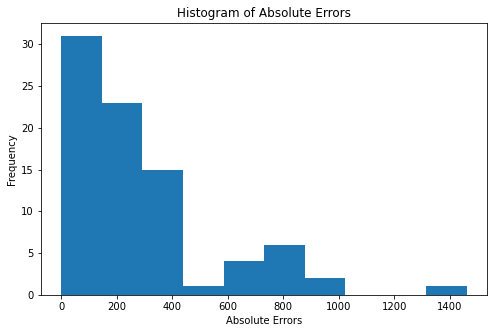

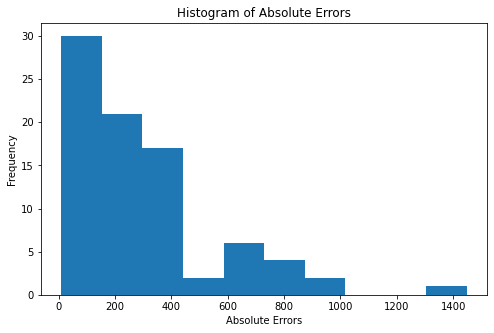

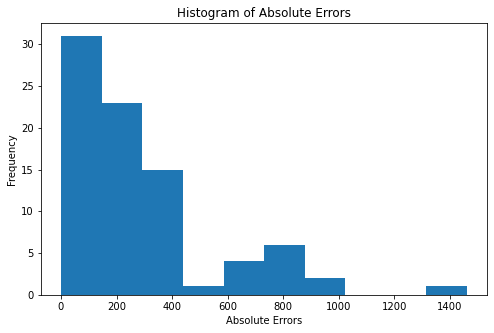

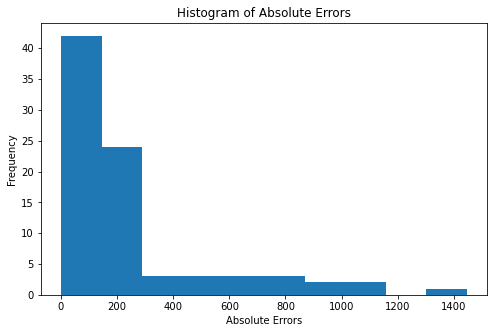

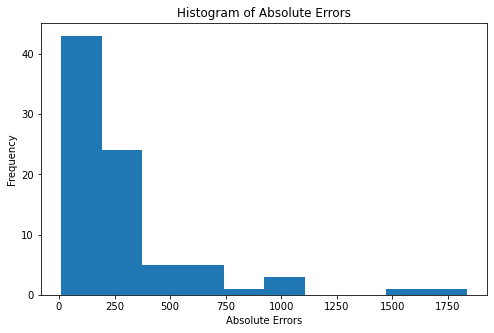

[17:19:27] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


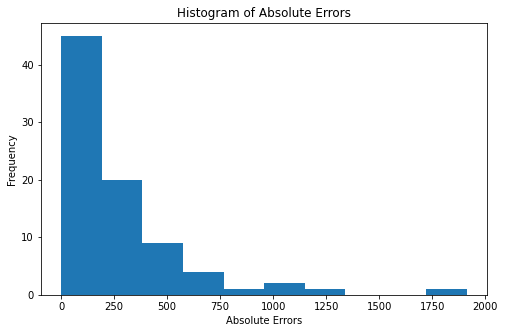

OLS
MAE on test data: 289.1198474563254
RMSE on test data: 395.67876997732736
R squared on test data: 0.8138412837159135
MAPE on test data: 1.6758951613034847


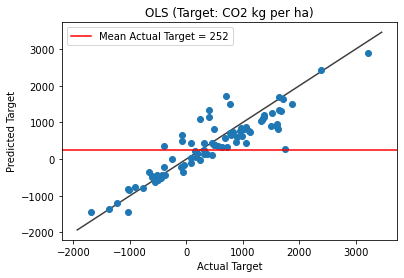

Lasso
MAE on test data: 289.1785774418281
RMSE on test data: 395.6274064401978
R squared on test data: 0.8138896115527795
MAPE on test data: 1.6723846894493917


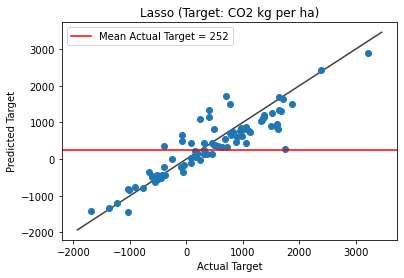

Ridge
MAE on test data: 296.7933702378644
RMSE on test data: 397.0562232340393
R squared on test data: 0.8125429008456484
MAPE on test data: 2.5281541695411893


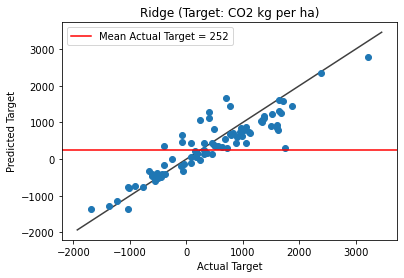

ElasticNet
MAE on test data: 289.17105283747475
RMSE on test data: 395.6335408544009
R squared on test data: 0.8138838400261217
MAPE on test data: 1.672730983727449


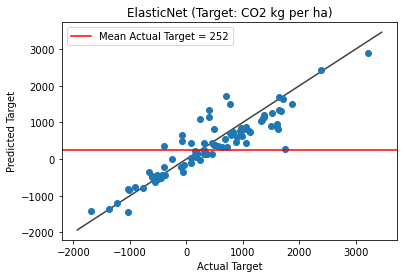

SVR
MAE on test data: 257.34081369913906
RMSE on test data: 390.77460161985834
R squared on test data: 0.8184273067008414
MAPE on test data: -6.438993798670727


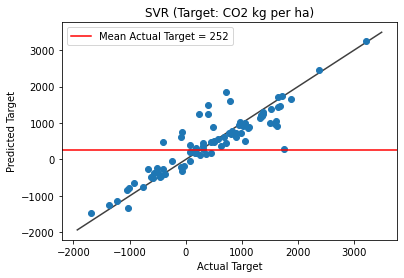

GBR
MAE on test data: 281.25938215387794
RMSE on test data: 426.7782497895864
R squared on test data: 0.7834279369215815
MAPE on test data: 7.5537634813536565


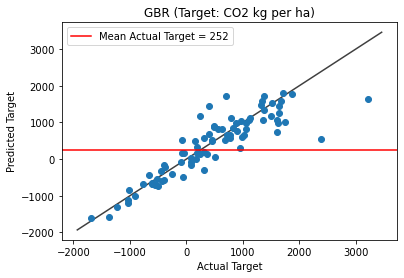

XGBoost
MAE on test data: 266.92853378112056
RMSE on test data: 407.9125865605876
R squared on test data: 0.8021518062153119
MAPE on test data: 4.5823384697363485


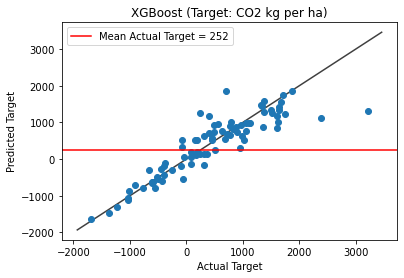

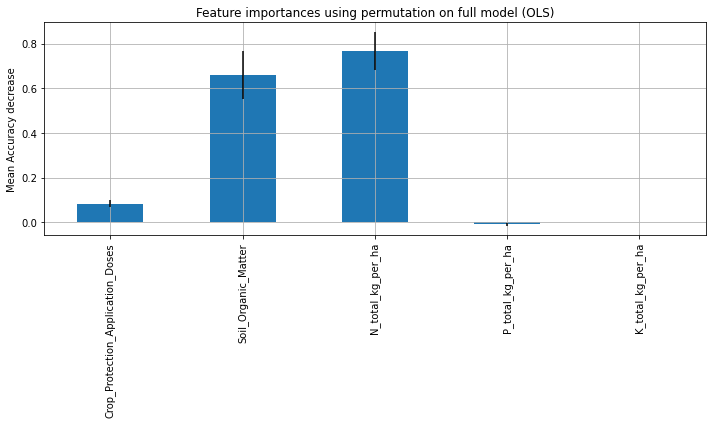

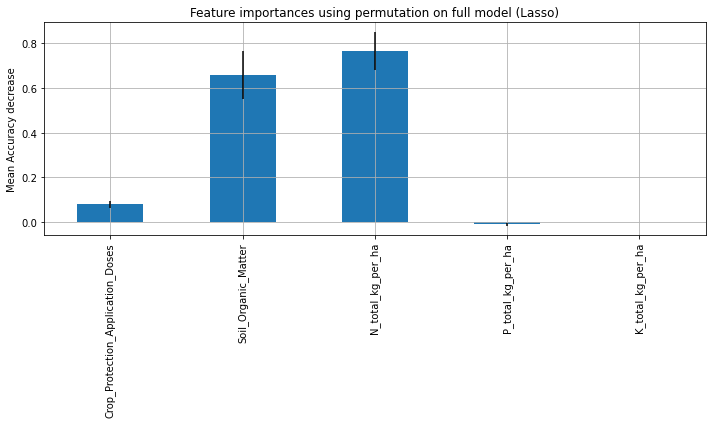

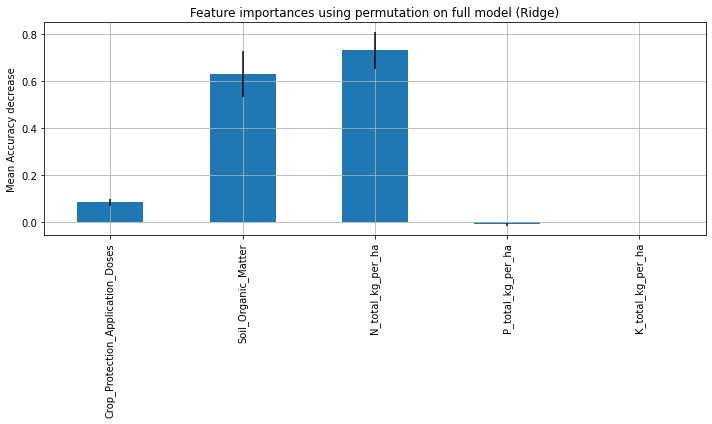

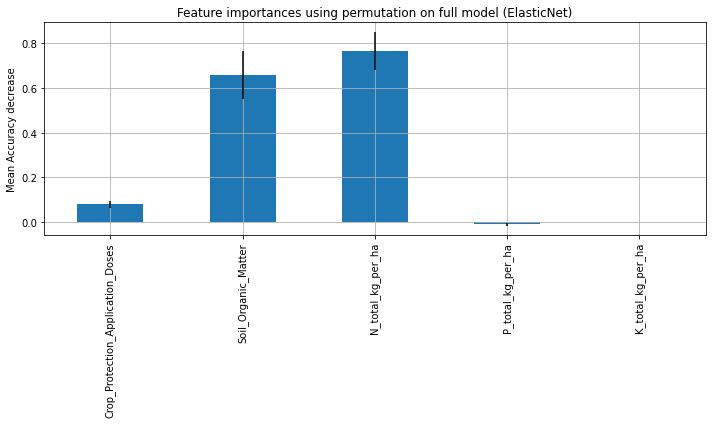

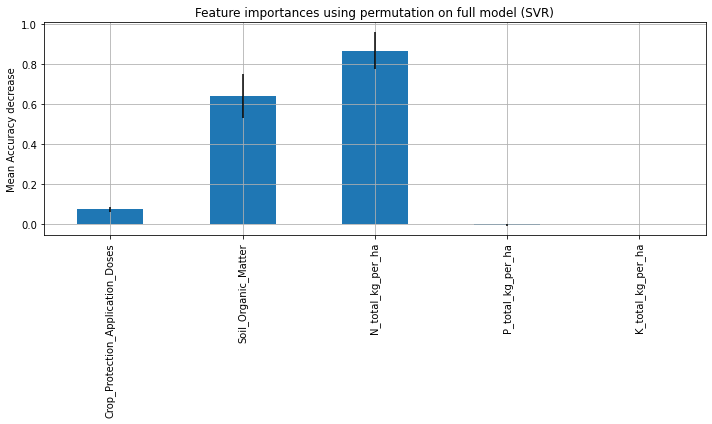

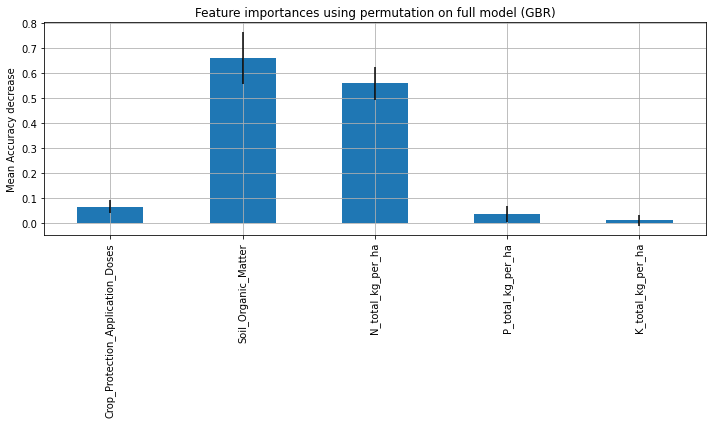

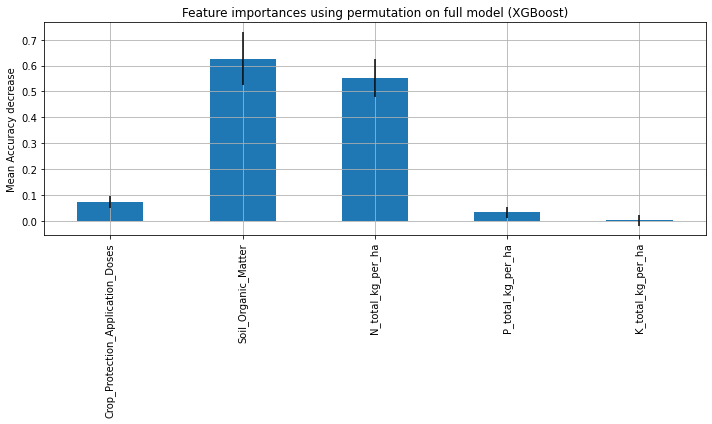

In [6]:
#Summer CO2 Prediction, combined elements

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_combined_elements.csv').drop(columns = 'Unnamed: 0')

df = df.drop(columns = ['Yield_kg_per_Ha'])

train_CO2_kg_per_ha, test_CO2_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

X_train_CO2_kg_per_ha = train_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha'])
X_test_CO2_kg_per_ha = test_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_CO2_kg_per_ha)
X_train_CO2_kg_per_ha = standard_scaler_X.transform(X_train_CO2_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_CO2_kg_per_ha)
X_train_CO2_kg_per_ha = power_transform_X.transform(X_train_CO2_kg_per_ha)

X_test_CO2_kg_per_ha = standard_scaler_X.transform(X_test_CO2_kg_per_ha)
X_test_CO2_kg_per_ha = power_transform_X.transform(X_test_CO2_kg_per_ha)

y_train_CO2_kg_per_ha = np.array(train_CO2_kg_per_ha['CO2_kg_per_Ha']).reshape(-1, 1)

mean_CO2_kg_per_ha = y_train_CO2_kg_per_ha.mean()

y_test_CO2_kg_per_ha = np.array(test_CO2_kg_per_ha['CO2_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_CO2_kg_per_ha))

y_train_CO2_kg_per_ha = standard_scaler_y.transform(y_train_CO2_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_CO2_kg_per_ha)

y_train_CO2_kg_per_ha = power_transform_y.transform(y_train_CO2_kg_per_ha)

y_test_CO2_kg_per_ha = standard_scaler_y.transform(y_test_CO2_kg_per_ha)

y_test_CO2_kg_per_ha = power_transform_y.transform(y_test_CO2_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_CO2_kg_per_ha, y_train_CO2_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_CO2_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_CO2_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_CO2_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_CO2_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: CO2 kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_CO2_kg_per_ha, y_test_CO2_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

,CO2_kg_per_Ha,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,N_total_kg_per_ha,P_total_kg_per_ha,K_total_kg_per_ha
0,-220.35,14.0,2.500000,3049.333333,205.5,48.0,48.0
1,3847.21,18.0,2.500000,3575.055556,492.0,216.0,216.0
2,415.52,13.0,2.500000,3116.200000,198.0,60.0,60.0
3,724.51,9.0,2.500000,7678.888889,202.4,95.2,96.0
4,502.10,9.0,2.500000,7756.363636,179.4,95.2,90.0
...,...,...,...,...,...,...,...
500,-239.89,15.0,2.597851,4073.493976,92.0,0.0,0.0
501,314.80,17.0,3.120000,6969.677419,184.0,0.0,0.0
502,-312.82,19.0,2.930000,6969.636364,92.0,0.0,0.0
503,485.73,17.0,3.240000,7954.666667,207.0,0.0,0.0


None


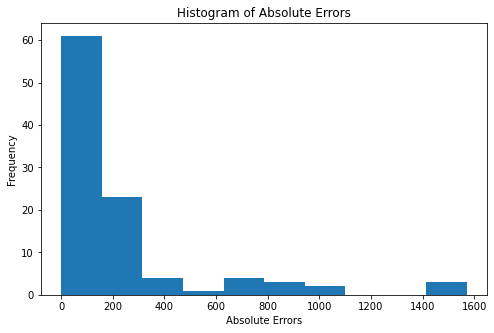

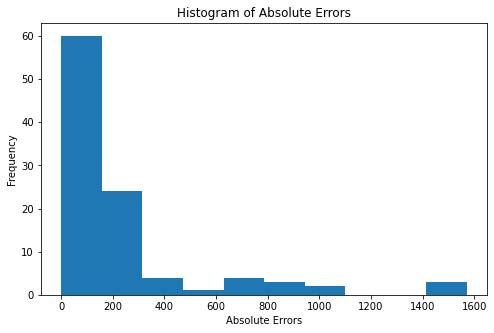

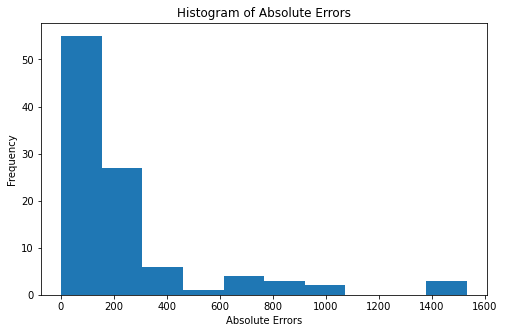

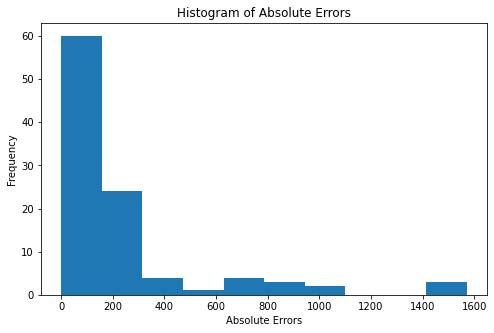

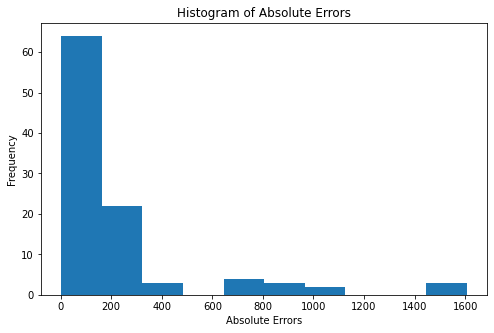

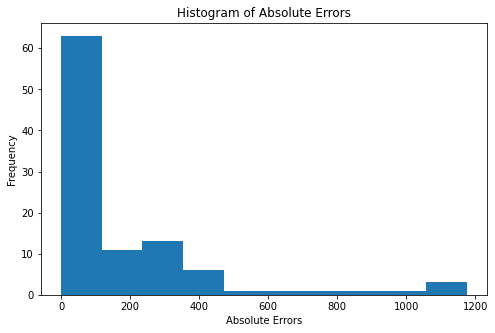

[17:19:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


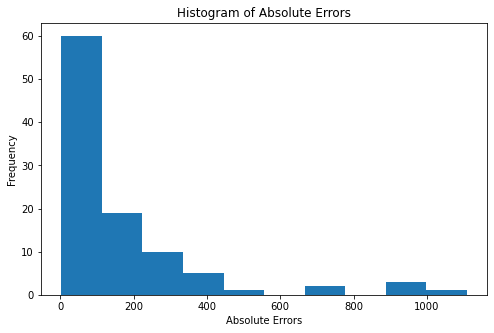

OLS
MAE on test data: 236.22674465104168
RMSE on test data: 393.6871704676002
R squared on test data: 0.7137392520639128
MAPE on test data: 40.74773117744026


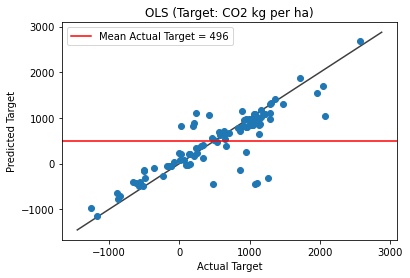

Lasso
MAE on test data: 236.31990284070977
RMSE on test data: 393.6543732207275
R squared on test data: 0.7137869456341052
MAPE on test data: 40.788905318362715


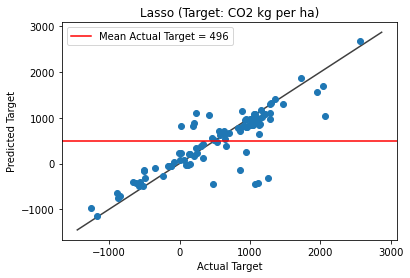

Ridge
MAE on test data: 242.73978191257265
RMSE on test data: 392.00722213885473
R squared on test data: 0.7161771125884204
MAPE on test data: 38.188344317706466


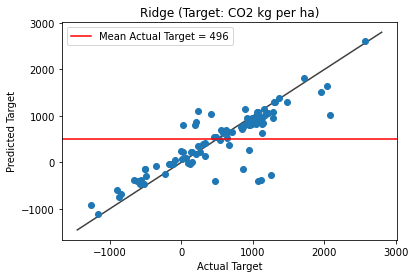

ElasticNet
MAE on test data: 236.30837264034307
RMSE on test data: 393.65825981750123
R squared on test data: 0.7137812939746762
MAPE on test data: 40.78365003901827


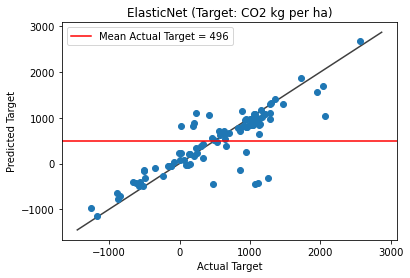

SVR
MAE on test data: 231.92843178622397
RMSE on test data: 392.6406703547843
R squared on test data: 0.7152591072489429
MAPE on test data: 43.97860606091353


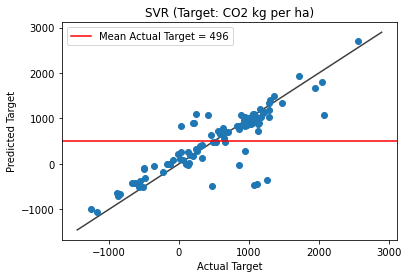

GBR
MAE on test data: 183.5808533491934
RMSE on test data: 310.19528262242494
R squared on test data: 0.8222827210553263
MAPE on test data: 34.30794259201541


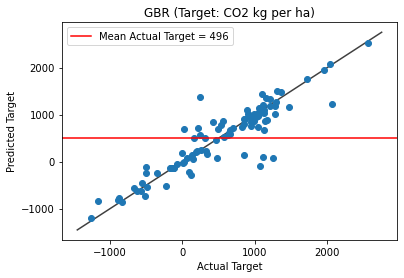

XGBoost
MAE on test data: 164.21591852924612
RMSE on test data: 270.83069209858155
R squared on test data: 0.864526286210135
MAPE on test data: 29.18807933115861


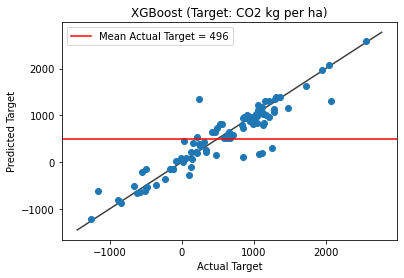

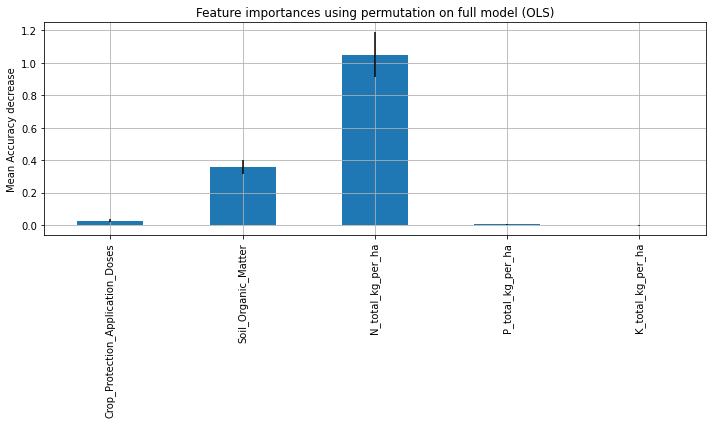

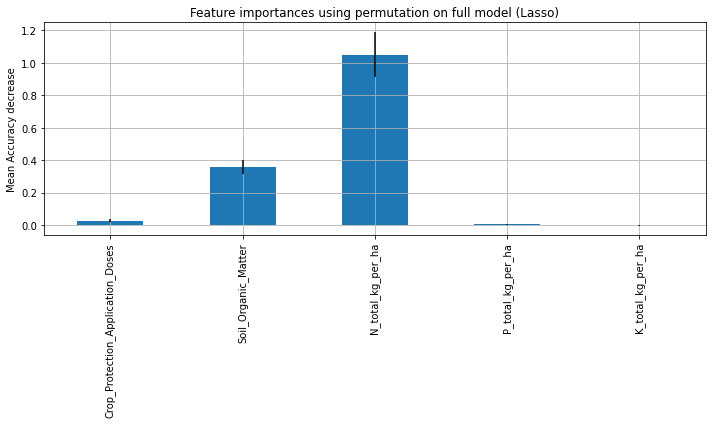

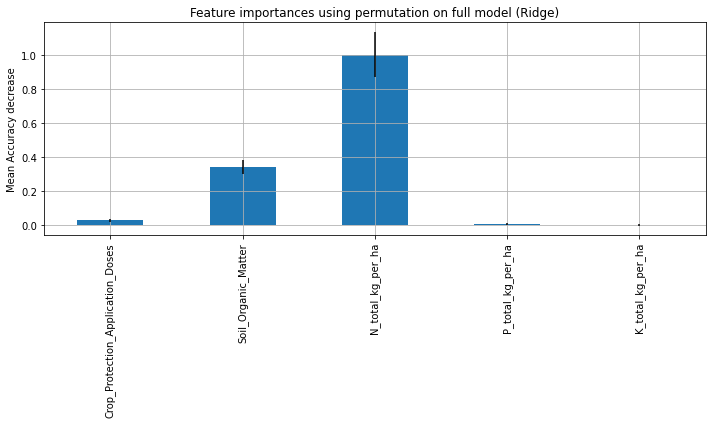

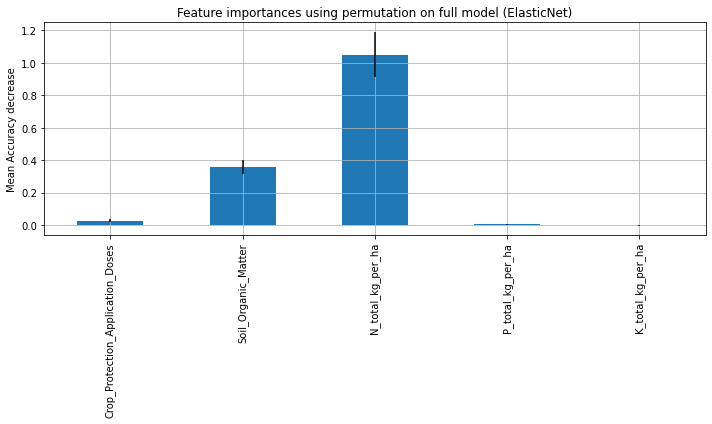

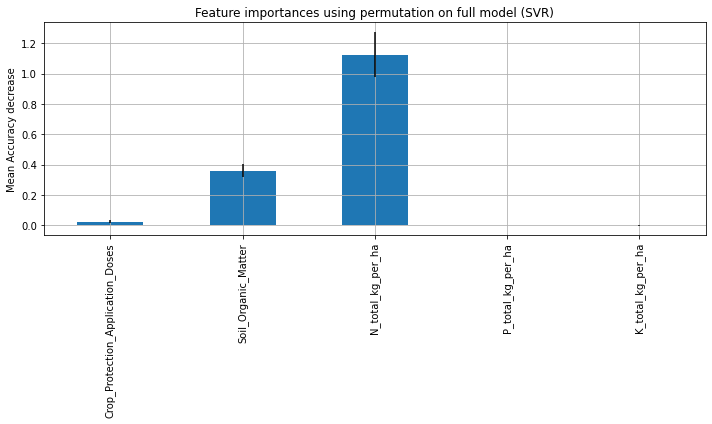

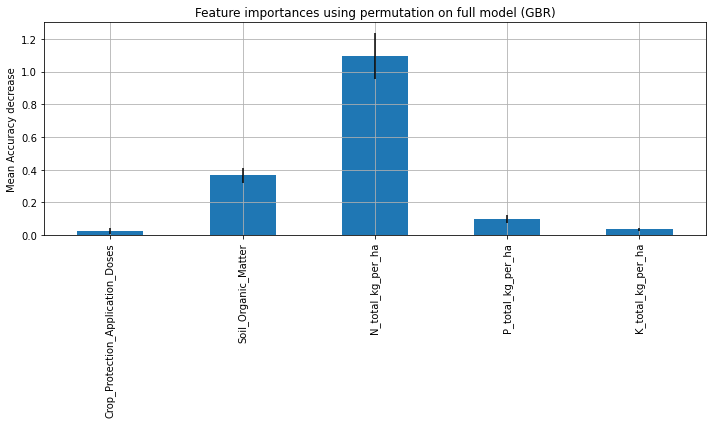

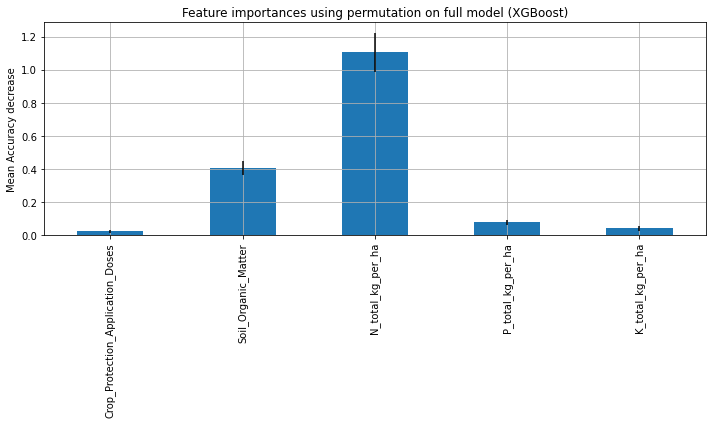

In [7]:
#Winter CO2 Prediction, elements combined

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_combined_elements.csv').drop(columns = 'Unnamed: 0')

print(display(df))

df = df.drop(columns = ['Yield_kg_per_Ha'])

train_CO2_kg_per_ha, test_CO2_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

X_train_CO2_kg_per_ha = train_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha'])
X_test_CO2_kg_per_ha = test_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_CO2_kg_per_ha)
X_train_CO2_kg_per_ha = standard_scaler_X.transform(X_train_CO2_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_CO2_kg_per_ha)
X_train_CO2_kg_per_ha = power_transform_X.transform(X_train_CO2_kg_per_ha)

X_test_CO2_kg_per_ha = standard_scaler_X.transform(X_test_CO2_kg_per_ha)
X_test_CO2_kg_per_ha = power_transform_X.transform(X_test_CO2_kg_per_ha)

y_train_CO2_kg_per_ha = np.array(train_CO2_kg_per_ha['CO2_kg_per_Ha']).reshape(-1, 1)

mean_CO2_kg_per_ha = y_train_CO2_kg_per_ha.mean()

y_test_CO2_kg_per_ha = np.array(test_CO2_kg_per_ha['CO2_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_CO2_kg_per_ha))

y_train_CO2_kg_per_ha = standard_scaler_y.transform(y_train_CO2_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_CO2_kg_per_ha)

y_train_CO2_kg_per_ha = power_transform_y.transform(y_train_CO2_kg_per_ha)

y_test_CO2_kg_per_ha = standard_scaler_y.transform(y_test_CO2_kg_per_ha)

y_test_CO2_kg_per_ha = power_transform_y.transform(y_test_CO2_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_CO2_kg_per_ha, y_train_CO2_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_CO2_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_CO2_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_CO2_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_CO2_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: CO2 kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_CO2_kg_per_ha, y_test_CO2_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()